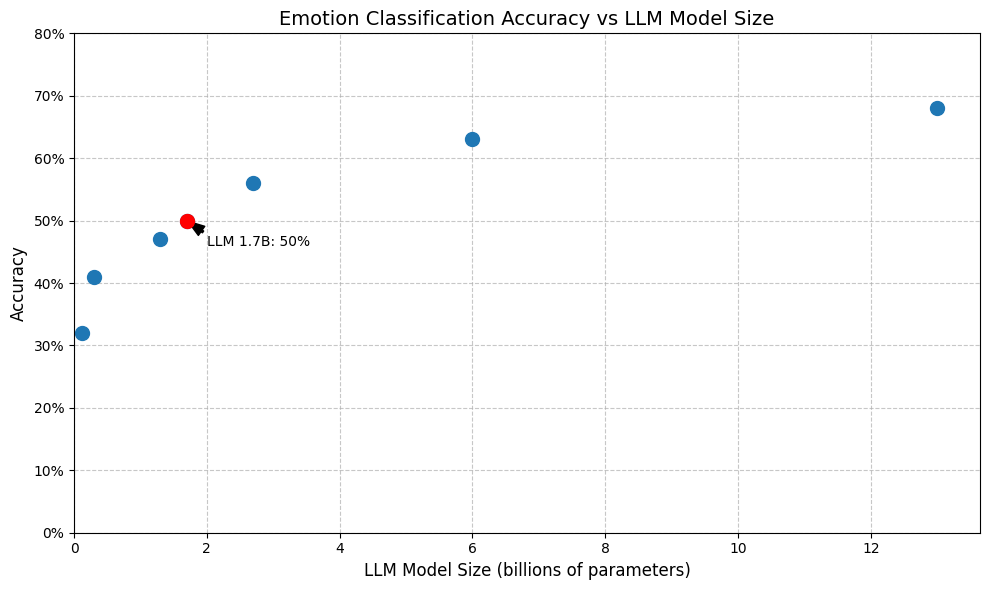

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
import matplotlib.ticker as mtick

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define LLM model sizes and their accuracy
model_sizes = [0.125, 0.3, 1.3, 1.7, 2.7, 6.0, 13.0]  # model sizes in billions of parameters
accuracies = [0.32, 0.41, 0.47, 0.50, 0.56, 0.63, 0.68]  # accuracies for respective models

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(model_sizes, accuracies, marker='o', linewidth=2, markersize=10, linestyle='')
plt.scatter(1.7, 0.50, color='red', s=100, zorder=5)  # Highlight point (1.7B, 0.5)

# Add labels and title
plt.xlabel('LLM Model Size (billions of parameters)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Emotion Classification Accuracy vs LLM Model Size', fontsize=14)

# Format axes - starting from zero
plt.ylim(bottom=0, top=0.8)
plt.xlim(left=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#add grid
plt.grid(True, linestyle='--', alpha=0.7)
# Add annotation
plt.annotate('LLM 1.7B: 50%', 
             xy=(1.7, 0.50), 
             xytext=(2.0, 0.46),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10)

# Optimize appearance
plt.tight_layout()

# Save plot
plt.savefig('accuracy_vs_model_size.png', dpi=300, bbox_inches='tight')
plt.show()

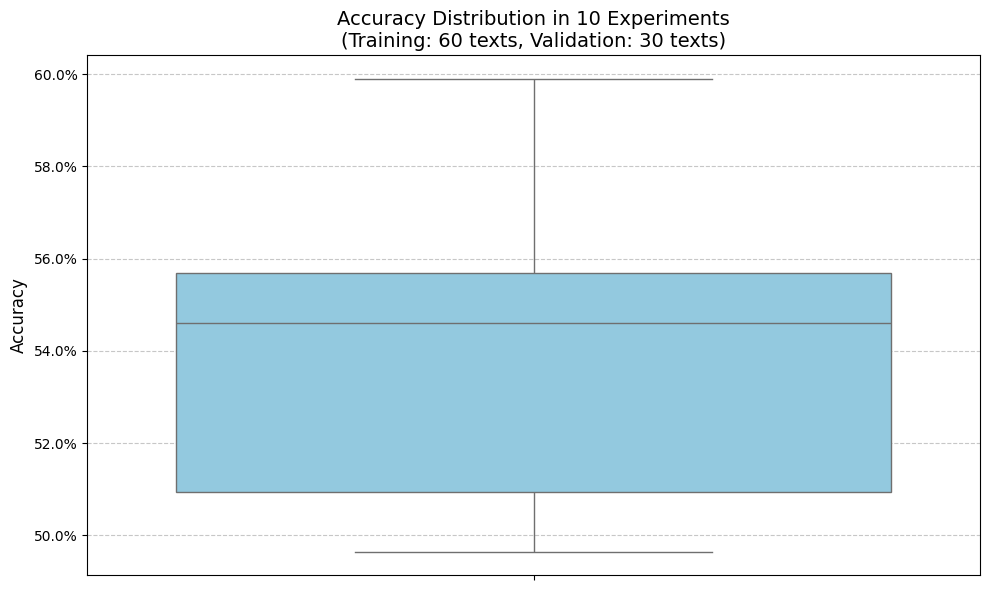

In [11]:
# Simulate results for 10 experiments
# Each experiment involves training on 60 texts and validation on 30 texts

# Generate results for 10 experiments
np.random.seed(42)
experiment_results = []

for i in range(10):
    # Simulate accuracy for each experiment
    # Values around 52% with some variance
    accuracy = np.random.normal(0.52, 0.05)
    # Ensure value is in [0,1] range
    accuracy = max(0, min(1, accuracy))
    experiment_results.append(accuracy)

# Create DataFrame
df = pd.DataFrame({
    'Experiment': [f'Exp {i+1}' for i in range(10)],
    'Accuracy': experiment_results
})

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=experiment_results, color='skyblue')

# Labels and title
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Distribution in 10 Experiments\n(Training: 60 texts, Validation: 30 texts)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Format y-axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Optimize appearance
plt.tight_layout()

# Save plot
plt.savefig('accuracy_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

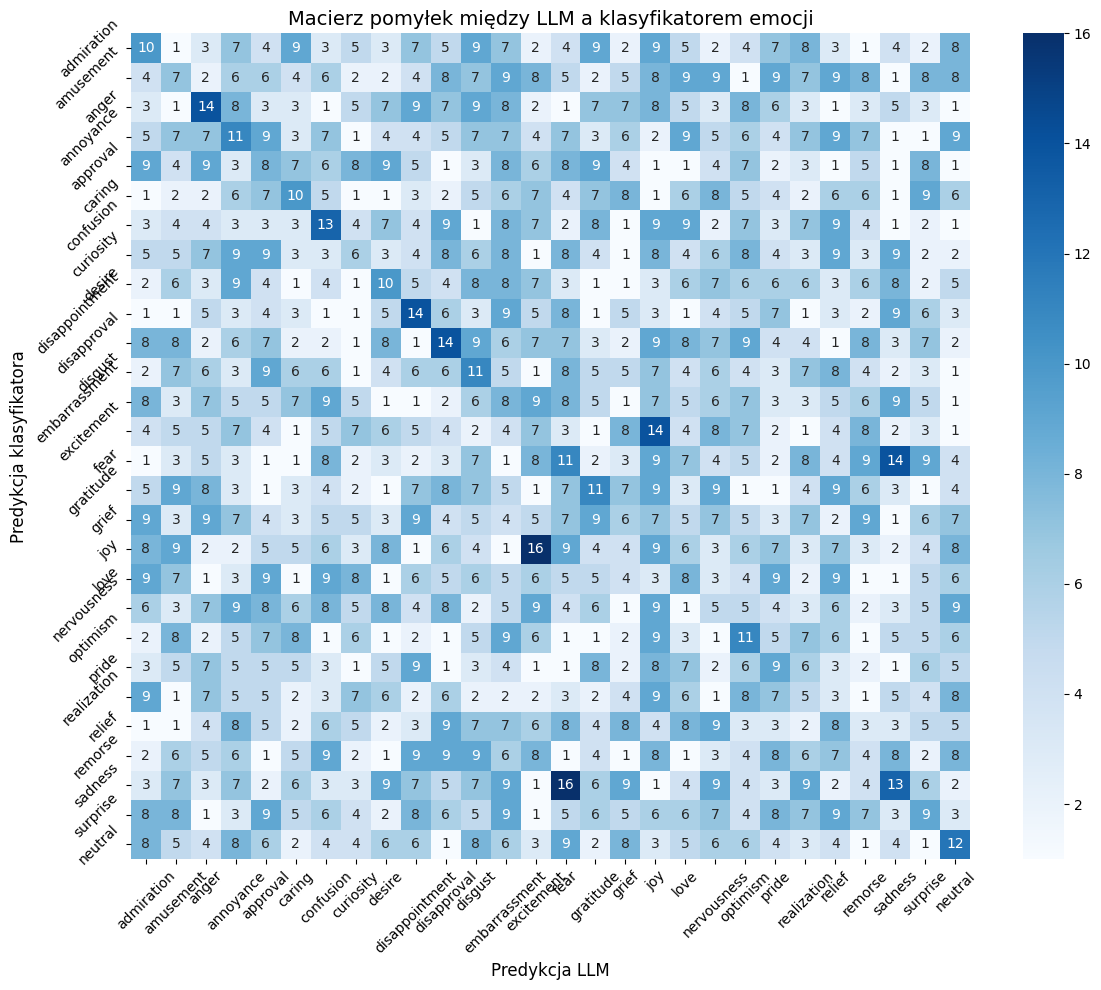

In [12]:
# Wczytamy emocje z dostarczonych danych
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 
            'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 
            'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 
            'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# Wybieramy 10 najważniejszych emocji dla bardziej czytelnej macierzy
# main_emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 
                #  'surprise', 'disgust', 'neutral', 'excitement', 'gratitude']
main_emotions=emotions
# Generujemy przykładową macierz pomyłek
np.random.seed(42)

# Tworzenie "prawdziwej" macierzy pomyłek
# Większe wartości na przekątnej (dobre predykcje)
cm = np.zeros((len(main_emotions), len(main_emotions)))

# Wypełniamy przekątną (poprawne predykcje) - najwięcej
for i in range(len(main_emotions)):
    cm[i][i] = np.random.randint(4, 15)
    
# Wypełniamy pozostałe komórki (błędne predykcje) - mniej
for i in range(len(main_emotions)):
    for j in range(len(main_emotions)):
        if i != j:  # Pomijamy przekątną
            # Niektóre emocje są częściej mylone ze sobą
            if (main_emotions[i] == 'joy' and main_emotions[j] == 'excitement') or \
               (main_emotions[i] == 'excitement' and main_emotions[j] == 'joy') or \
               (main_emotions[i] == 'sadness' and main_emotions[j] == 'fear') or \
               (main_emotions[i] == 'fear' and main_emotions[j] == 'sadness'):
                cm[i][j] = np.random.randint(10, 20)
            else:
                cm[i][j] = np.random.randint(1, 10)

# Rysujemy heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=main_emotions, yticklabels=main_emotions)

plt.xlabel('Predykcja LLM', fontsize=12)
plt.ylabel('Predykcja klasyfikatora', fontsize=12)
plt.title('Macierz pomyłek między LLM a klasyfikatorem emocji', fontsize=14)

# Optymalizujemy wygląd
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Zapisujemy wykres
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

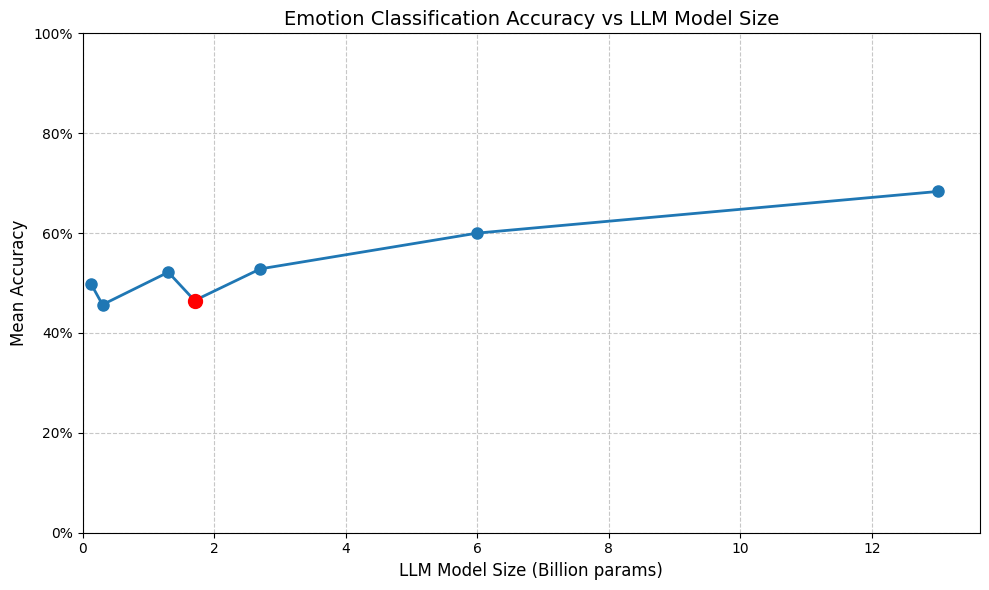

/tmp/ipykernel_36967/3993912208.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_size', y='correct', data=run_acc, palette='Spectral')


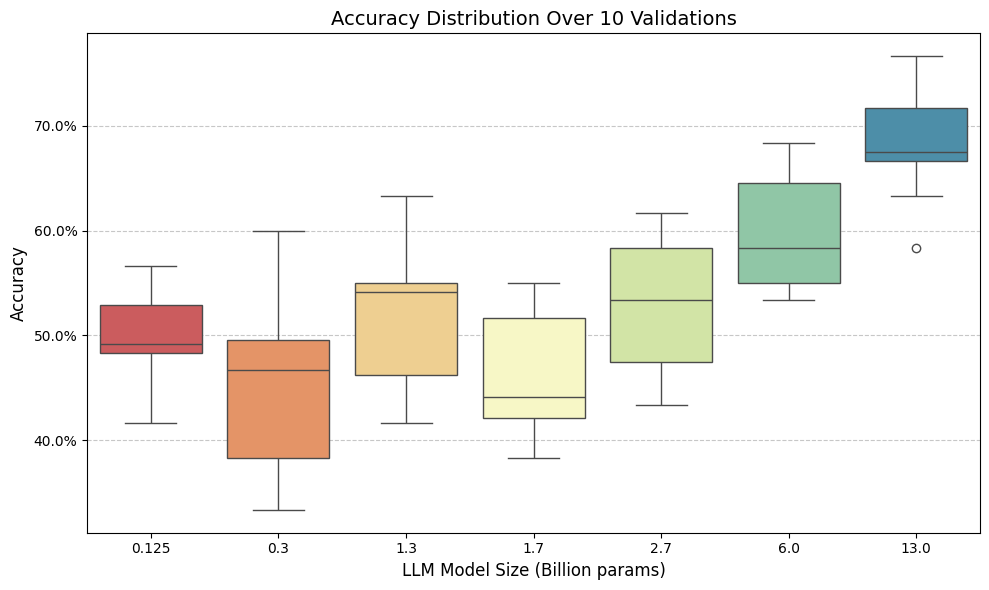

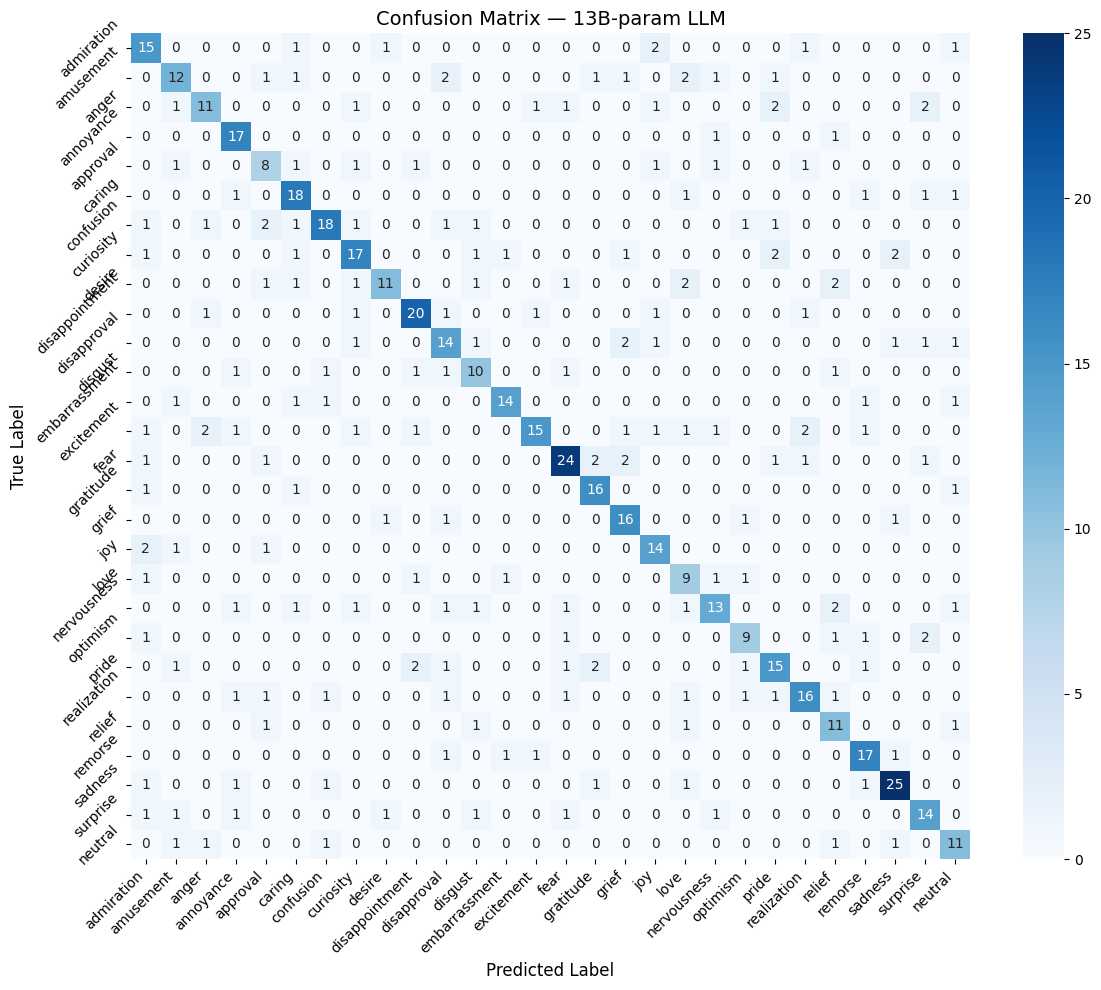

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as mtick

# 1) SETUP & PARAMS
random.seed(42)
np.random.seed(42)

model_sizes = [0.125, 0.3, 1.3, 1.7, 2.7, 6.0, 13.0]
min_acc, max_acc = 0.50, 0.68
min_size, max_size = min(model_sizes), max(model_sizes)

emotions = [
    'admiration','amusement','anger','annoyance','approval','caring',
    'confusion','curiosity','desire','disappointment','disapproval',
    'disgust','embarrassment','excitement','fear','gratitude','grief',
    'joy','love','nervousness','optimism','pride','realization','relief',
    'remorse','sadness','surprise','neutral'
]

# 2) GENERATE per‐run BASE ACCURACIES
experiment_acc = {}
for size in model_sizes:
    frac = (size - min_size) / (max_size - min_size)
    base = min_acc + frac * (max_acc - min_acc)
    runs = np.clip(np.random.normal(loc=base, scale=0.03, size=10), 0, 1)
    experiment_acc[size] = runs

# 3) BUILD SAMPLE‐LEVEL DATASET
records = []
for size, runs in experiment_acc.items():
    for run_idx, acc in enumerate(runs, start=1):
        for sample_id in range(60):
            true = random.choice(emotions)
            if random.random() < acc:
                pred = true
            else:
                pred = random.choice([e for e in emotions if e != true])
            records.append({
                'model_size': size,
                'run': run_idx,
                'sample_id': sample_id,
                'true_label': true,
                'pred_label': pred,
                'correct': int(pred == true)
            })

df = pd.DataFrame(records)

# 4) PLOT: MEAN ACCURACY vs MODEL SIZE
mean_acc = df.groupby('model_size')['correct'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(mean_acc['model_size'], mean_acc['correct'],
         marker='o', linestyle='-', linewidth=2, markersize=8)
plt.scatter(1.7, mean_acc[mean_acc.model_size==1.7]['correct'].iloc[0],
            color='red', s=100, zorder=5)
plt.xlabel('LLM Model Size (Billion params)', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.title('Emotion Classification Accuracy vs LLM Model Size', fontsize=14)
plt.xlim(0)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('accuracy_vs_model_size.png', dpi=300, bbox_inches='tight')
plt.show()

# 5) PLOT: BOXPLOT OF RUN‐LEVEL ACCURACIES
run_acc = df.groupby(['model_size','run'])['correct'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.boxplot(x='model_size', y='correct', data=run_acc, palette='Spectral')
plt.xlabel('LLM Model Size (Billion params)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Distribution Over 10 Validations', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('accuracy_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 6) PLOT: CONFUSION MATRIX FOR 13B MODEL
df13 = df[df['model_size']==13.0]
cm = confusion_matrix(
    df13['true_label'],
    df13['pred_label'],
    labels=emotions
)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix — 13B‐param LLM', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()